# Illustrating the Yee method for solving Maxwell's equations in vacuum

In [1]:
import numpy as np
from scipy.constants import c, mu_0, epsilon_0
import matplotlib.pyplot as plt

Initial condition

In [2]:
def Ez_init(x):
    return np.exp(-2 * (x - 0.1) ** 2) * np.sin(4 * (x - 0.1))

x, Δx = np.linspace(-2, 10, 500, retstep=True)

Δt = 0.1 * Δx / c

In [3]:
def vacuum_propagation(Hy, Ez):
    
    Hy[:-1] += Δt / (mu_0 * Δx) * (Ez[1:] - Ez[:-1])
    
    # boundary condition
    Hy[-1] += -Δt / (mu_0 * Δx) * Ez[-1]
    
    Ez[1:] += Δt / (epsilon_0 * Δx) * (Hy[1:] - Hy[:-1])
    
    # boundary condition
    Ez[0] += Δt / (epsilon_0 * Δx) * Hy[0]

Error 0.07411866268272796


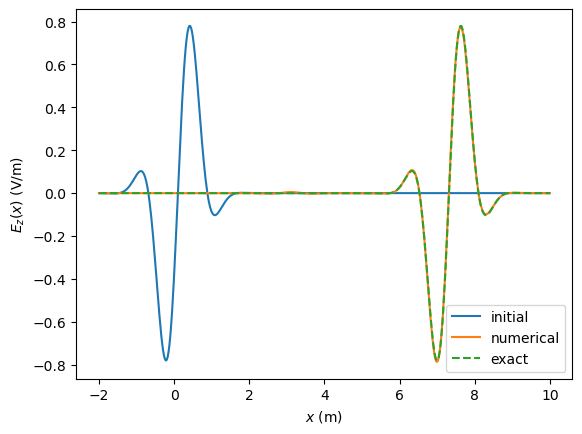

In [4]:
# preparing for the propagation

Ez = Ez_init(x)
Hy_init = -Ez / (c * mu_0)

Hy = Hy_init.copy()
Hy[1:-1] += (Hy[2:] - Hy[:-2]) / 4 + Δt / (4 * mu_0 * Δx) * (Ez[2:] - Ez[:-2])
Hy[0] += Hy[1] / 4 + Δt / (4 * mu_0 * Δx) * Ez[1]
Hy[-1] += -Hy[-2] / 4 - Δt / (4 * mu_0 * Δx) * Ez[-2]

# propagation
n_steps = 3000
t = n_steps * Δt

for _ in range(n_steps):
    vacuum_propagation(Hy, Ez)
    
plt.plot(x, Ez_init(x), label="initial")
plt.plot(x, Ez, label="numerical")
plt.plot(x, Ez_init(x - c * t), '--', label="exact")


error = np.linalg.norm(Ez_init(x - c * t) - Ez)
print(f"Error {error}")

plt.xlabel("$x$ (m)")
plt.ylabel("$E_z(x)$ (V/m)")
plt.legend()
plt.show()